<a href="https://colab.research.google.com/github/himanshag/SECOM/blob/main/base_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importing packages

In [108]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import plotly as py
import plotly.express as px
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
# to avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

#### Functions

In [109]:
# Function to remove missing values above a given threshold
def missing_remove(dataframe, threshold):
    columns = dataframe.columns[(dataframe.isna().sum()/dataframe.shape[1])>threshold].tolist()
    print(f"# Features deleted with more than {threshold} % missing values", len(columns))
    return dataframe.drop(columns, axis=1,inplace=True)

In [110]:
# Function to remove features with unique values
def unique_remove(dataframe):
    unique_features = []
    for col in dataframe.columns:
        if(dataframe[col].unique().size == 2):
            if(len(unique_features) == 0):
                unique_features =  dataframe[col]
            else:
                 unique_features = pd.concat([unique_features, dataframe[col]], axis=1)
            dataframe.drop(col, axis=1, inplace=True)

In [111]:
# Function to remove outlier
def outlier_detection_zcore(dataframe):
    data_mean, data_std  = dataframe.mean(), dataframe.std()
    data_z_scores = ((dataframe - data_mean) / data_std).abs()
    m = data_z_scores > 3
    dataframe = dataframe.mask(m,inplace=True)
    return dataframe

In [226]:
def rfc(X_train_rfc,X_test_rfc,max_depth):
  scaler = StandardScaler()
  scaler.fit(X_train_rfc)
  train_std = pd.DataFrame(scaler.transform(X_train_rfc), columns=X_train_rfc.columns)
  test_std = pd.DataFrame(scaler.transform(X_test_rfc), columns=X_test_rfc.columns)
  model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=max_depth,random_state=0)
  model.fit(X_train_rfc, y_train)
  y_pred = model.predict(X_test_rfc)
  print(confusion_matrix(y_test, y_pred))
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
  print(classification_report(y_test, y_pred))
  ax = plt.gca()
  plot = plot_roc_curve(model, X_test_rfc, y_test, ax=ax, alpha=0.8)
  print("Test Accuracy Score", accuracy_score(y_test, y_pred))
  f1score = f1_score(y_test, y_pred, average='micro')
  mccscore=matthews_corrcoef(y_test, y_pred)
  return f1score, mccscore

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, matthews_corrcoef
from yellowbrick.classifier import ConfusionMatrix, ClassPredictionError
def evaluate(train_df, test_df, train_target, test_target):
    
    scaler = StandardScaler()
    scaler.fit(train_df)
    train_std = pd.DataFrame(scaler.transform(train_df), columns=train_df.columns)
    test_std = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)
    
    logreg = LogisticRegression(random_state = 42, class_weight='balanced', C=200, dual=False, solver='liblinear')
    logreg.fit(train_std, train_target.values.ravel())
    
    y_pred = logreg.predict(test_std)
    y_true = test_target.values.ravel()
    f1score = f1_score(y_true, y_pred, average='micro')
    mccscore=matthews_corrcoef(y_true, y_pred)
    
   
    cm = ConfusionMatrix(logreg, classes=['Pass', 'Fail'], cmap="YlGn", size=(800,700))
    cm.score(test_std, y_true)
    cm.show()
    ax = plt.gca()
    plot = plot_roc_curve(logreg, test_df, test_target, ax=ax, alpha=0.8)
    
    return f1score, mccscore

In [232]:
from sklearn import svm
def svmevaluate(train_df, test_df, train_target, test_target):
    
    scaler = StandardScaler()
    scaler.fit(train_df)
    train_std = pd.DataFrame(scaler.transform(train_df), columns=train_df.columns)
    test_std = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)
    
    svme = svm.SVC()
    svme.fit(train_std, train_target.values.ravel())
    
    y_pred = svme.predict(test_std)
    y_true = test_target.values.ravel()
    f1score = f1_score(y_true, y_pred, average='micro')
    mccscore=matthews_corrcoef(y_true, y_pred)
    
   
    cm = ConfusionMatrix(svme, classes=['Pass', 'Fail'], cmap="YlGn", size=(800,700))
    cm.score(test_std, y_true)
    cm.show()
    ax = plt.gca()
    plot = plot_roc_curve(svme, test_df, test_target, ax=ax, alpha=0.8)
    
    return f1score, mccscore

#### Importing and basic cleaning

In [114]:
# Importing data from internet in runtime
data_url="https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"

In [115]:
# Assigning data to a pandas dataframe
secom_data = pd.read_csv(data_url,sep=' ',header=None)

In [116]:
# Renaming the columns 
secom_data.columns = ["Feature_"+str(column+1) for column in range(len(secom_data.columns))]
secom_data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_581,Feature_582,Feature_583,Feature_584,Feature_585,Feature_586,Feature_587,Feature_588,Feature_589,Feature_590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [117]:
# Importing target data from internet in runtime
label_url="https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"

In [118]:
# Assigning target data to a pandas dataframe
secom_labels = pd.read_csv(label_url, sep = " ",header=None)

In [119]:
# Renaming the columns 
secom_labels.columns = ["Classification","Timestamp"]

In [120]:
# Changing datatype for consitency
secom_labels['Timestamp'] = pd.to_datetime(secom_labels['Timestamp'],errors='raise')

In [121]:
# Merging the data
data= pd.concat([secom_labels,secom_data],axis=1)

In [122]:
# Dropping the timestamp column as it provides no insights
data.drop(columns="Timestamp", errors='raise',inplace=True)

In [123]:
target = data[['Classification']]
data.drop(['Classification'], axis=1,inplace=True)

#### Spliting the data into training set and test set

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.2, random_state=42, stratify=target)
# We use the startify parameter as the data is imbalanced on the basis of pass and fail and this will ensure the same 
#is retained when we split - Random state will help us create a reproducible data - Test size is the split ration

In [125]:
X_test_original = X_test

#### Re-labeling the Target values


In [126]:
# Relabeling target variables 1 is pass and 0 is fail
y_train = y_train.replace(to_replace=[-1, 1], value=[1, 0])
y_test = y_test.replace(to_replace=[-1, 1], value=[1, 0])

In [19]:
# # Scaling the data
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
# X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Decision : Removing columns with more that 50% missing values

In [127]:
X_train.shape

(1253, 590)

In [128]:
X_train_missing = X_train
missing_remove(X_train_missing, 0.5)
X_train_missing.shape

# Features deleted with more than 0.5 % missing values 32


(1253, 558)

# Decision : Removing Columns with non unique values

In [22]:
X_train_unique = X_train_missing
unique_remove(X_train_unique)
X_train_unique.shape

(1175, 442)

In [129]:
# From test set deleting columns that are removed in training set
X_test_missing = pd.DataFrame(X_test[np.array(X_train.columns)])
X_test_missing.shape

(314, 558)

In [ ]:
# From test set deleting columns that are removed in training set
X_test_missing = pd.DataFrame(X_test[np.array(X_train.columns)])
X_test_unique.shape

# Decision : Replacing outliers with 3s boundary

##### Other option of removing outliers and replacing them has been explored in file "Base file - removing outliers and replacing with knn.ipynb"

In [130]:
def replace_outlier(val, mean, std):
    if val > mean + 3*std:
        return mean + 3*std 
    elif val < mean - 3*std:
        return mean - 3*std
    return val

In [131]:
# replace with 3s in X_train
for col in X_train_unique.columns:
    mean = X_train_unique[col].mean()
    std_dev = X_train_unique[col].std(axis=0)
    X_train_unique[col] = X_train_unique[col].map(lambda x: replace_outlier(x, mean, std_dev))

In [132]:
# replace with 3s in X_test
for col in X_test_unique.columns:
    mean = X_test_unique[col].mean()
    std_dev = X_test_unique[col].std(axis=0)
    X_test_unique[col] = X_test_unique[col].map(lambda x: replace_outlier(x, mean, std_dev))

# Decision : KNN Imputation

In [196]:
from sklearn.impute import KNNImputer
knn = KNNImputer()
knn.fit(X_train_missing)
X_train_knn=pd.DataFrame(knn.transform(X_train_missing), columns=X_train_missing.columns)
X_train_knn.isna().sum().sum()

0

In [197]:
from sklearn.impute import KNNImputer
knn = KNNImputer()
knn.fit(X_test_missing)
X_test_knn=pd.DataFrame(knn.transform(X_test_missing), columns=X_test_missing.columns)
X_test_knn.isna().sum().sum()

0

[[  0  21]
 [  0 293]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.93      1.00      0.97       293

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314

Test Accuracy Score 0.9331210191082803


(0.9331210191082803, 0.0)

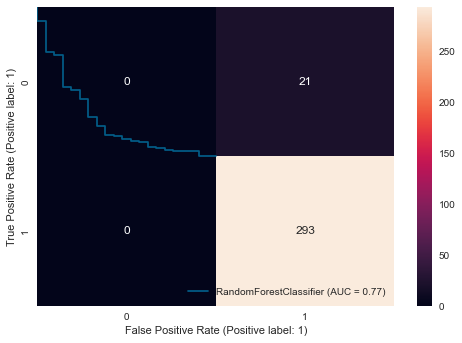

In [227]:
rfc(X_train_knn,X_test_knn,6)

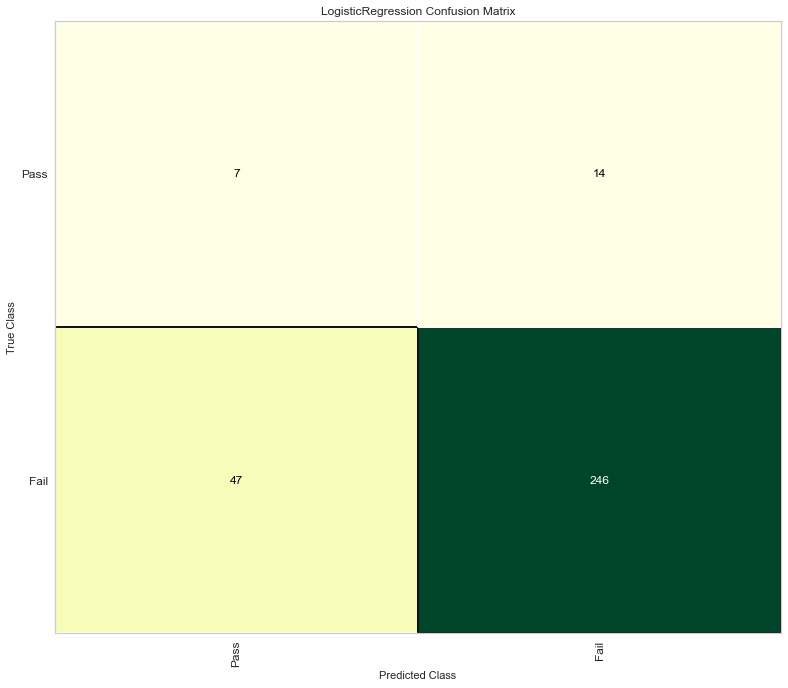

(0.8057324840764332, 0.114476044953223)

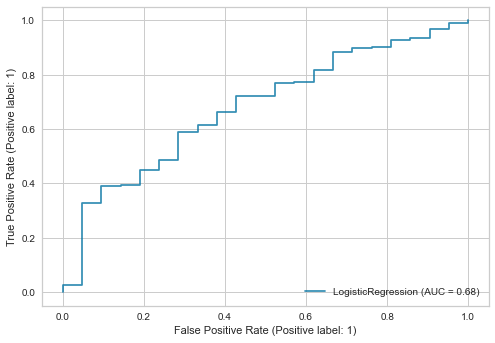

In [225]:
evaluate(X_train_knn, X_test_knn, y_train, y_test)

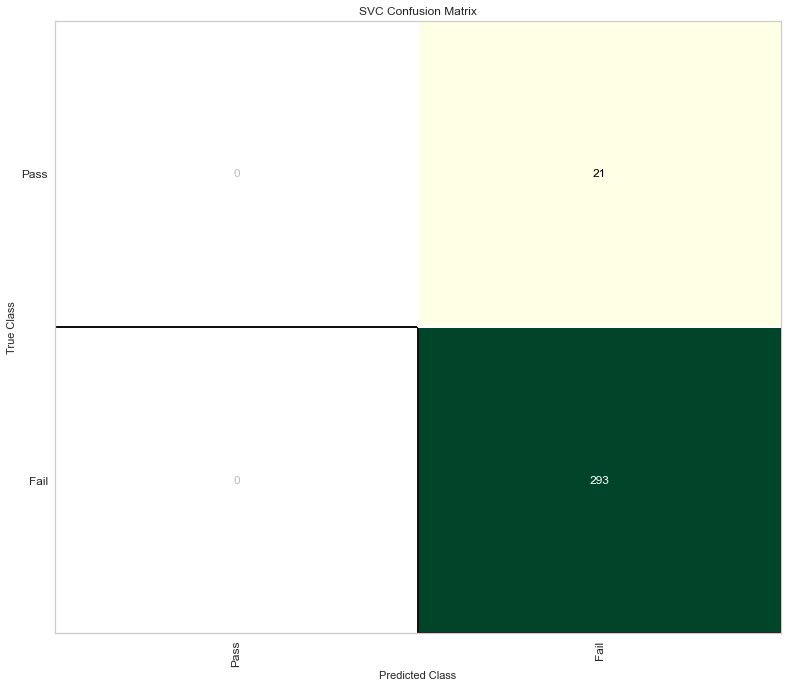

(0.9331210191082803, 0.0)

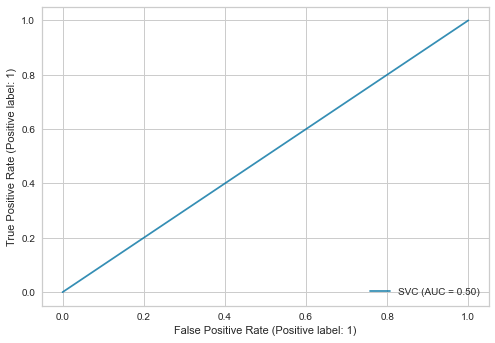

In [233]:
svmevaluate(X_train_knn, X_test_knn, y_train, y_test)

## Explored and Rejected : Mice

In [202]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

MICE_imputer = IterativeImputer(random_state=100)
X_train_MICE = X_train.copy(deep=True)
X_train_MICE.iloc[:,:] = pd.DataFrame(MICE_imputer.fit_transform(X_train))
#X_train_MICE.index = X_train.index
X_train = X_train_MICE

In [206]:
X_train

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_577,Feature_578,Feature_583,Feature_584,Feature_585,Feature_586,Feature_587,Feature_588,Feature_589,Feature_590
1198,3075.32,2491.07,2185.1000,1201.0491,0.7821,100.0,105.8489,0.1208,1.4002,-0.0151,...,1.0970,16.9045,0.4974,0.0128,0.0033,2.5767,0.0223,0.0105,0.0034,47.0690
436,3071.58,2489.47,2217.3777,1425.1041,1.7585,100.0,106.2556,0.1200,1.5270,0.0066,...,1.3400,11.3021,0.5004,0.0316,0.0066,6.3183,0.0329,0.0055,0.0022,16.6695
635,3017.53,2524.09,2201.0667,880.2317,1.4148,100.0,106.5478,0.1211,1.3720,-0.0005,...,1.4452,17.2719,0.4998,0.0097,0.0026,1.9495,0.0328,0.0235,0.0068,71.5333
996,2901.62,2569.45,2223.9000,1745.3724,1.9974,100.0,96.7567,0.1241,1.5950,-0.0163,...,1.6245,13.2830,0.5004,0.0174,0.0034,3.4771,0.0200,0.0205,0.0061,102.5241
782,2982.59,2466.86,2117.5889,894.0996,1.4330,100.0,106.4944,0.1253,1.4418,-0.0096,...,1.2250,14.3891,0.4986,0.0172,0.0038,3.4561,0.0373,0.0079,0.0030,21.0599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,3058.89,2504.38,2221.9444,1551.6947,1.5296,100.0,99.2678,0.1222,1.4068,0.0057,...,1.8868,8.9120,0.5018,0.0460,0.0097,9.1677,-0.0012,0.0220,0.0072,0.0000
365,2988.92,2460.91,2178.0778,941.9524,0.8039,100.0,104.0167,0.1229,1.5829,-0.0278,...,1.2816,10.4728,0.4976,0.0148,0.0032,2.9645,0.0291,0.0135,0.0045,46.4165
1420,2975.74,2517.35,2162.5556,1041.0369,1.4305,100.0,100.4111,0.1238,1.4968,-0.0201,...,1.0949,16.9589,0.4994,0.0115,0.0033,2.3077,0.0299,0.0071,0.0020,23.6431
113,2928.16,2523.21,2210.6111,1184.6481,1.2577,100.0,102.9356,0.1201,1.4453,-0.0126,...,1.8020,7.1763,0.5016,0.0160,0.0035,3.1882,0.0049,0.0144,0.0047,293.2614


In [209]:
def Outlier(X) :
       
        z_train= pd.DataFrame(stats.zscore(X,nan_policy='omit'))
        z_train
       
        print('Number of Outliers : ',sum(z_train.apply(lambda x: sum(x.apply(lambda x: 1 if abs(x)>3 else 0)))))

        is_outlier = abs(z_train)>3
        is_outlier.columns = X.columns
        is_outlier.index = X.index
        return(X.mask(is_outlier, np.nan))

In [210]:
from scipy import stats
X_test = Outlier(X_test)

Number of Outliers :  1472


In [213]:
X_test_MICE

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_577,Feature_578,Feature_583,Feature_584,Feature_585,Feature_586,Feature_587,Feature_588,Feature_589,Feature_590
246,2985.06,2509.80,2177.3222,1089.3655,1.3101,100.0,101.1478,0.1216,1.4245,-0.0056,...,1.5783,17.2084,0.4989,0.0095,0.0031,1.8958,0.0154,0.0271,0.0104,176.0329
1315,2942.21,2459.02,2210.8556,1665.0062,2.4475,100.0,97.1056,0.1227,1.5257,-0.0009,...,1.4715,14.4480,0.5014,0.0155,0.0034,3.0998,0.0098,0.0071,0.0022,72.1094
444,3114.46,2656.84,2207.0444,1269.6078,1.7571,100.0,97.0189,0.1221,1.4164,0.0006,...,1.9176,7.5069,0.5036,0.0091,0.0029,1.8001,0.0282,0.0194,0.0059,68.7444
296,2864.05,2533.75,2224.0000,1510.0797,1.5611,100.0,99.8300,0.1199,1.3743,-0.0005,...,1.9678,10.7489,0.5025,0.0197,0.0044,3.9136,0.0291,0.0237,0.0071,81.3456
1295,3089.26,2414.63,2209.8000,1175.5508,1.1464,100.0,112.1367,0.1227,1.3557,0.0024,...,1.4267,12.3718,0.5000,0.0103,0.0026,2.0700,0.0308,0.0183,0.0063,59.3775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,2929.20,2486.59,2234.6111,1590.1699,1.2049,100.0,98.7567,0.1208,1.5884,0.0097,...,1.4843,19.5630,0.5000,0.0115,0.0037,2.3030,0.0254,0.0160,0.0051,62.9443
1309,3014.85,2453.45,2189.6778,1295.2883,2.1394,100.0,107.4811,0.1238,1.4214,0.0070,...,2.0113,14.5194,0.5004,0.0163,0.0035,3.2522,0.0230,0.0064,0.0024,27.7025
1333,2971.75,2566.30,2206.4000,982.5452,1.1853,100.0,116.8167,0.1228,1.5840,-0.0058,...,2.0346,14.8076,0.4963,0.0160,0.0041,3.2258,0.0230,0.0210,0.0053,91.4264
972,3043.12,2473.67,2180.5556,1165.1351,0.7892,100.0,101.4578,0.1226,1.4276,0.0121,...,1.9655,17.0028,0.4998,0.0166,0.0042,3.3275,0.0223,0.0159,0.0053,71.0108


In [211]:
X_test_MICE = X_test_missing.copy(deep=True)
X_test_MICE.iloc[:,:] = pd.DataFrame(imp.fit_transform(X_test_missing))
X_test_missing = X_test_MICE

[IterativeImputer] Completing matrix with shape (314, 558)
[IterativeImputer] Ending imputation round 1/10, elapsed time 14.18
[IterativeImputer] Change: 0.0, scaled tolerance: 36.664 
[IterativeImputer] Early stopping criterion reached.


[[  0  21]
 [  0 293]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.93      1.00      0.97       293

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314

Test Accuracy Score 0.9331210191082803


(0.9331210191082803, 0.0)

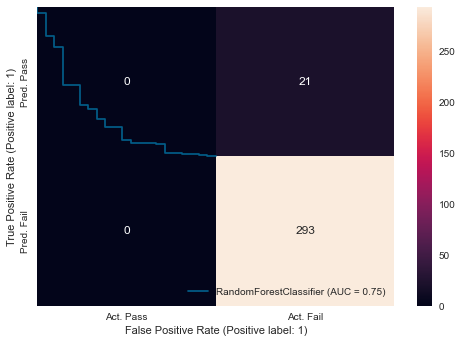

In [216]:
rfc(X_train_MICE,X_test_MICE,4)

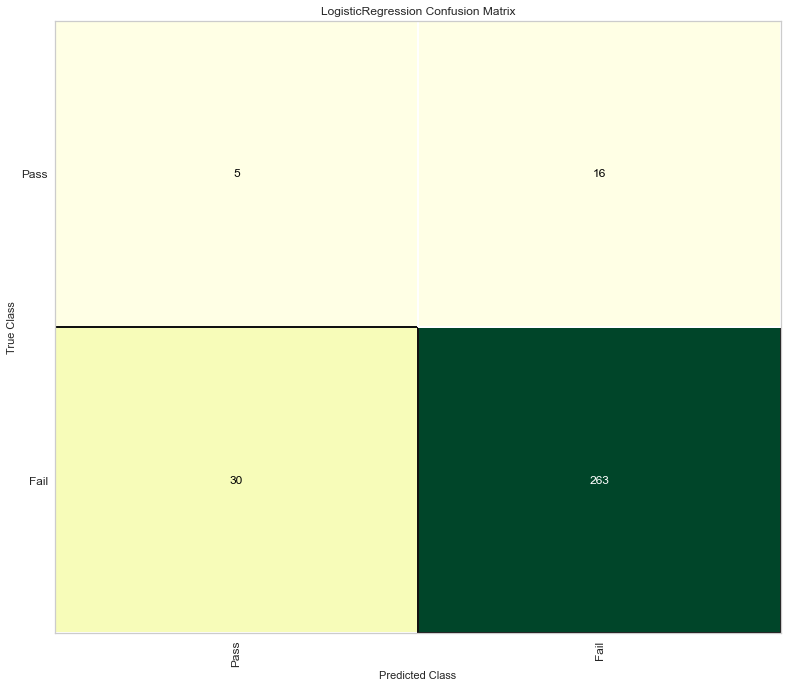

(0.8535031847133757, 0.10772261664364587)

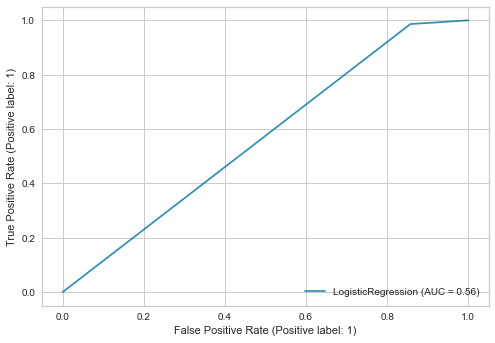

In [217]:
evaluate(X_train_MICE, X_test_MICE, y_train, y_test)

In [ ]:
lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20, verbose=2, imputation_order='roman',random_state=0)
X_train_mice_20 =imp.fit_transform(X_train_unique)

In [ ]:
X_test_MICE_20 = X_test_unique.copy(deep=True)
X_test_MICE_20.iloc[:,:] = pd.DataFrame(imp.fit_transform(X_test_unique))
X_test_unique = X_test_MICE_20

In [ ]:
rfc(X_train_mice_20,X_test_MICE_20,4)

# Feature Selection

## Boruta - 15 features

In [138]:
#Boruta function

def BorutaFeatureSelection (X, y) :
    feature_names = np.array(X.columns)

    model = model = RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample', max_depth=5, random_state=100)
    model.fit(X, y)
    
    feature_selector = BorutaPy(model, n_estimators='auto', verbose=2, random_state=100, max_iter=100)

    feature_selector.fit(X.to_numpy(),y)

    feature_selector.support_

    feature_selector.ranking_

    feature_ranks = list(zip(feature_names, 
                             feature_selector.ranking_, 
                             feature_selector.support_))

    for feat in feature_ranks:
        print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))
        
    final_features = list()
    indexes = np.where(feature_selector.ranking_ <= 1)
    for x in np.nditer(indexes):
        final_features.append(feature_names[x])
    print(final_features)
    
    return pd.DataFrame(X.filter(final_features)) , final_features

In [139]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
X_train_boruta , final_features = BorutaFeatureSelection(X_train_knn,y_train.values.ravel())

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	558
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	558
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	558
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	558
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	558
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	558
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	558
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	537
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	17
Rejected: 	537
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	17
Rejected: 	537
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	17
Rejected: 	537
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	13
Rejected: 	539
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	13
Rejected: 	539
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	13
Rejected: 	539
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	13
Rejected: 	539
Iteration: 	16 / 100
Confirmed: 	8
Tentat

In [140]:
# From test set deleting columns that are removed in training set
X_test_boruta = X_test_knn[np.array(X_train_boruta.columns)]
X_test_boruta.shape

(314, 15)

[[  0  21]
 [  0 293]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.93      1.00      0.97       293

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314

Test Accuracy Score 0.9331210191082803


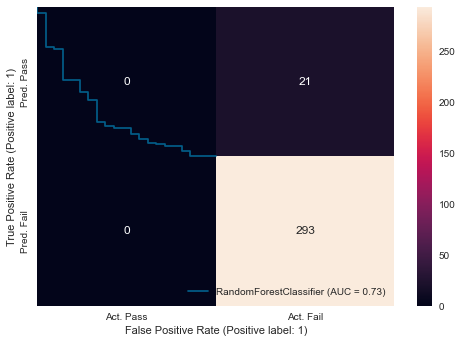

In [153]:
rfc(X_train_boruta,X_test_boruta,6)

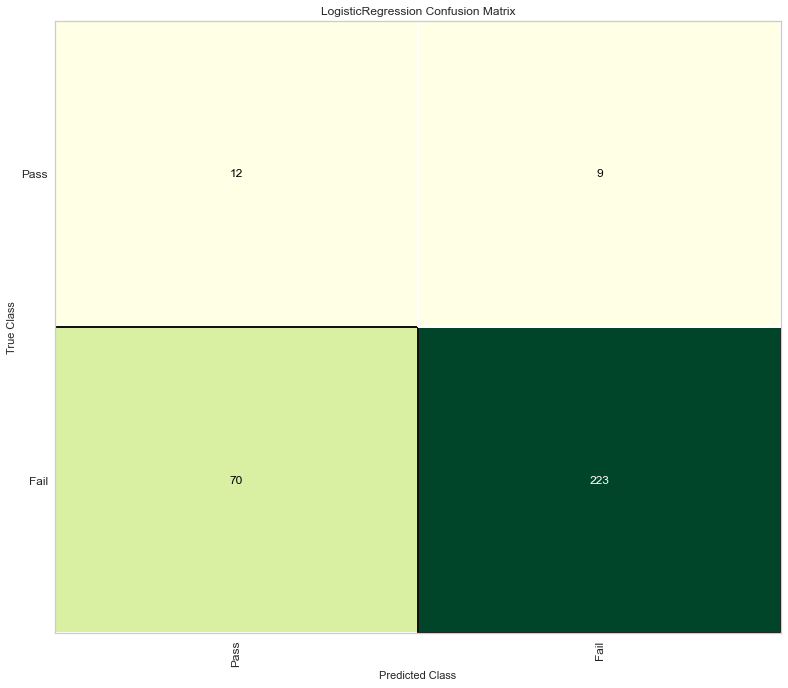

(0.7484076433121017, 0.1891085885485535)

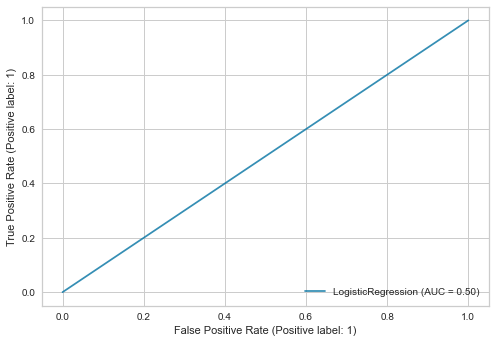

In [154]:
evaluate(X_train_boruta, X_test_boruta, y_train, y_test)

## Chi Square based on P values over less than 0.4 - 29 features

In [144]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
normalized_x_train = X_train_knn
normalized_x_train[normalized_x_train.columns] = MinMaxScaler().fit_transform(normalized_x_train[normalized_x_train.columns])
normalized_x_train

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_577,Feature_578,Feature_583,Feature_584,Feature_585,Feature_586,Feature_587,Feature_588,Feature_589,Feature_590
0,0.541632,0.480126,0.488754,0.163123,0.000091,0.0,0.503337,0.939347,0.449506,0.223469,...,0.002215,0.133392,0.612500,0.013401,0.012683,0.013183,0.327485,0.095176,0.086957,0.063839
1,0.535532,0.477786,0.615529,0.237708,0.000969,0.0,0.511968,0.933126,0.721960,0.410699,...,0.004929,0.072746,0.706250,0.053393,0.044878,0.051356,0.416040,0.029987,0.043478,0.022609
2,0.447375,0.528432,0.551465,0.056327,0.000660,0.0,0.518169,0.941680,0.388913,0.349439,...,0.006104,0.137369,0.687500,0.006807,0.005854,0.006784,0.415205,0.264668,0.210145,0.097020
3,0.258322,0.594789,0.641146,0.344321,0.001184,0.0,0.310383,0.965008,0.868070,0.213115,...,0.008107,0.094189,0.706250,0.023187,0.013659,0.022369,0.308271,0.225554,0.184783,0.139053
4,0.390387,0.444709,0.223595,0.060943,0.000676,0.0,0.517036,0.974339,0.538891,0.270923,...,0.003645,0.106163,0.650000,0.022761,0.017561,0.022155,0.452799,0.061278,0.072464,0.028563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,0.514834,0.499598,0.633465,0.279848,0.000763,0.0,0.363674,0.950233,0.463687,0.402934,...,0.011037,0.046873,0.750000,0.084025,0.075122,0.080425,0.131161,0.245111,0.224638,0.000000
1249,0.400711,0.436005,0.461173,0.076873,0.000110,0.0,0.464454,0.955677,0.842071,0.113891,...,0.004277,0.063768,0.618750,0.017656,0.011707,0.017140,0.384294,0.134289,0.126812,0.062954
1250,0.379214,0.518572,0.400208,0.109857,0.000674,0.0,0.387937,0.962675,0.657069,0.180328,...,0.002192,0.133981,0.675000,0.010636,0.012683,0.010439,0.390977,0.050847,0.036232,0.032067
1251,0.301610,0.527144,0.588952,0.157663,0.000518,0.0,0.441511,0.933904,0.546412,0.245039,...,0.010090,0.028083,0.743750,0.020208,0.014634,0.019422,0.182122,0.146023,0.134058,0.397748


In [145]:
from sklearn.feature_selection import SelectKBest, chi2
f_score = chi2(normalized_x_train,y_train)
p_values = pd.Series(f_score[1])
p_values.index = normalized_x_train.columns
p_values.sort_values(ascending=True,inplace=True)
significant = p_values[0:29]
new = list(significant.index)
X_train_chi = X_train_knn.loc[:, new]

In [146]:
# From test set deleting columns that are removed in training set
X_test_chi = X_test_knn[np.array(X_train_chi.columns)]
X_test_chi.shape

(314, 29)

[[  0  21]
 [  6 287]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.93      0.98      0.96       293

    accuracy                           0.91       314
   macro avg       0.47      0.49      0.48       314
weighted avg       0.87      0.91      0.89       314

Test Accuracy Score 0.9140127388535032


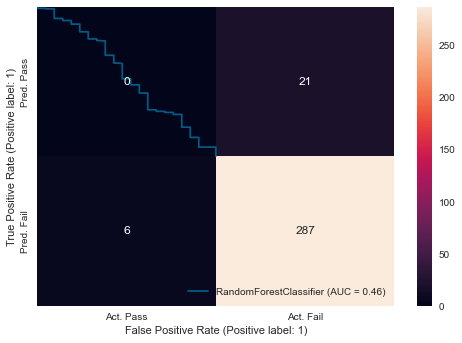

In [156]:
rfc(X_train_chi,X_test_chi,7)

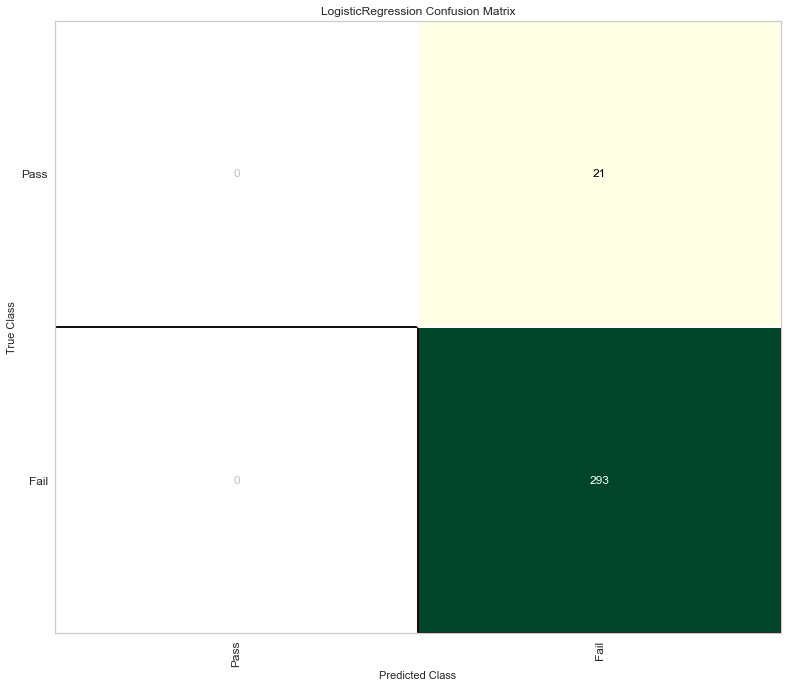

(0.9331210191082803, 0.0)

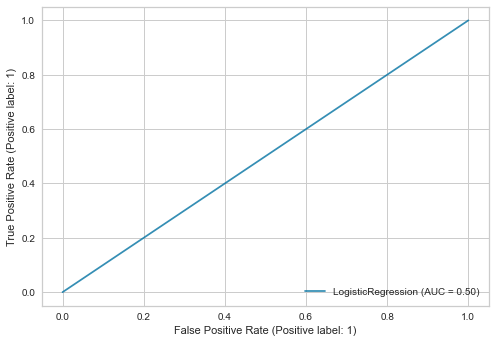

In [155]:
evaluate(X_train_chi, X_test_chi, y_train, y_test)

## Chi Square based on top values- 20 features

In [157]:
from sklearn.feature_selection import SelectKBest, chi2
chi = SelectKBest(chi2, k=15).fit(normalized_x_train, y_train)
new_c = normalized_x_train.columns[chi.get_support()]
X_train_chi_k = X_train_knn.loc[:, new_c]

In [158]:
# From test set deleting columns that are removed in training set
X_test_chi_k = X_test_knn[np.array(X_train_chi_k.columns)]
X_test_chi_k.shape

(314, 15)

[[  0  21]
 [  0 293]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.93      1.00      0.97       293

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314

Test Accuracy Score 0.9331210191082803


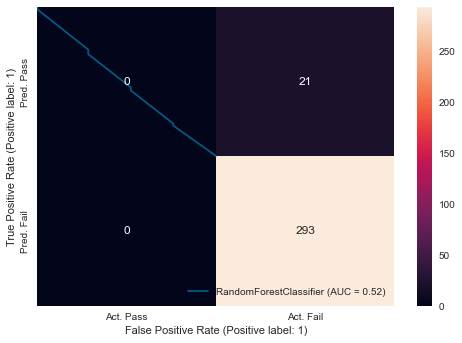

In [159]:
rfc(X_train_chi_k,X_test_chi_k,7)

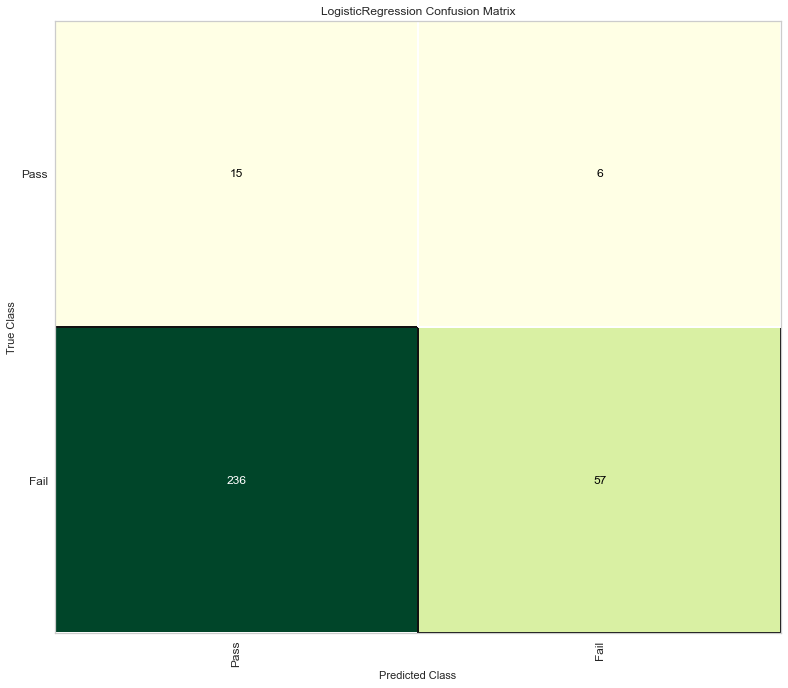

(0.22929936305732485, -0.05687380285651507)

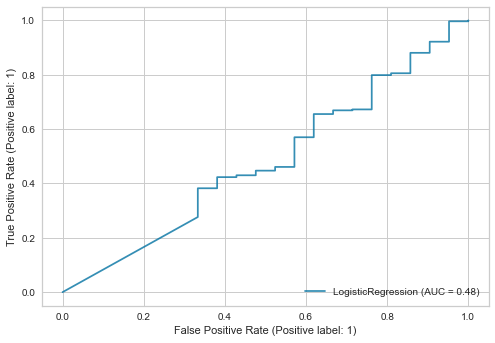

In [160]:
evaluate(X_train_chi_k, X_test_chi_k, y_train, y_test)

## Mutual Info gain - 15 features

In [161]:
from sklearn.feature_selection import mutual_info_classif
mutual = mutual_info_classif(X_train_knn,y_train.values.ravel())
from sklearn.feature_selection import SelectKBest
top20 = SelectKBest(mutual_info_classif,k=15).fit(X_train_knn,y_train)
new_m = X_train_knn.columns[top20.get_support()]
X_train_m = X_train_knn.loc[:, new_m]

In [162]:
# From test set deleting columns that are removed in training set
X_test_m = X_test_knn[np.array(X_train_m.columns)]
X_test_m.shape

(314, 15)

[[  0  21]
 [  0 293]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.93      1.00      0.97       293

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314

Test Accuracy Score 0.9331210191082803


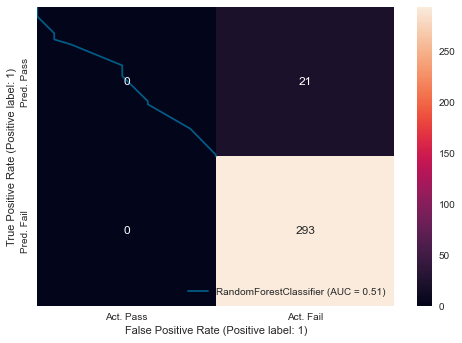

In [163]:
rfc(X_train_m,X_test_m,6)

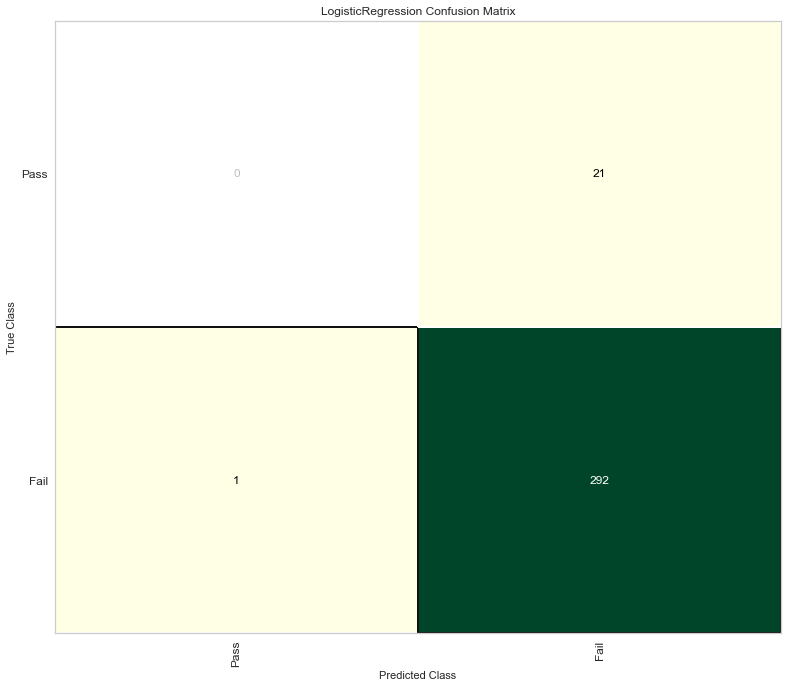

(0.9299363057324841, -0.015132255601226411)

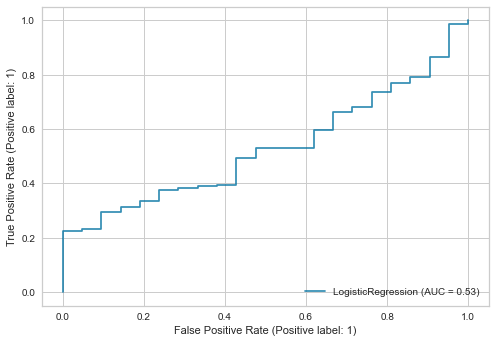

In [165]:
evaluate(X_train_m, X_test_m, y_train, y_test)

## Lasso - 31 features

In [169]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lasso, LogisticRegression

In [170]:
## Selecting features using Lasso
sel_ = SelectFromModel(Lasso(alpha=0.5))
sel_.fit(X_train_knn, y_train)
sel_.get_support()
X_train_knn = pd.DataFrame(X_train_knn)

In [171]:
#To See Selected set of features

selected_feat = X_train_knn.columns[(sel_.get_support())]
print('total features: {}'.format((X_train_knn.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
np.sum(sel_.estimator_.coef_ == 0)))

total features: 558
selected features: 0
features with coefficients shrank to zero: 558


In [47]:
#Make a list of with the selected features
removed_feats = X_train_knn.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

X_train_lasso = sel_.transform(X_train_knn)
X_test_lasso = sel_.transform(X_test_knn)
X_train_lasso.shape, X_test_lasso.shape

((1175, 0), (392, 0))

In [48]:
rfc(X_train_lasso,X_test_lasso,6)

ValueError: Found array with 0 feature(s) (shape=(1175, 0)) while a minimum of 1 is required by RandomForestClassifier.

In [49]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),k_features=15,forward=True,verbose=True,scoring='neg_mean_squared_error')

In [50]:
sfs.fit(X_train_knn, y_train)
sfs_list = list(sfs.k_feature_names_)
print(sfs_list)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 442 out of 442 | elapsed:    8.0s finished
Features: 1/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 441 out of 441 | elapsed:    7.0s finished
Features: 2/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:    7.0s finished
Features: 3/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 439 out of 439 | elapsed:    6.9s finished
Features: 4/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 438 out of 438 | elapsed:    6.9s finished
Features: 5/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 437 out of 437 | elapsed:    7.1s finished
Features: 6/15[Parallel(

['Feature_22', 'Feature_60', 'Feature_65', 'Feature_76', 'Feature_87', 'Feature_104', 'Feature_114', 'Feature_122', 'Feature_130', 'Feature_206', 'Feature_250', 'Feature_311', 'Feature_320', 'Feature_481', 'Feature_574']


In [51]:
# creating a new dataframe using the above variables and adding the target variable
X_train_sfs = X_train_knn[sfs_list]

In [52]:
# From test set deleting columns that are removed in training set
X_test_sfs = X_test_knn[np.array(X_train_sfs.columns)]
X_test_sfs.shape

(392, 15)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.93      1.00      0.97       366

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392

Test Accuracy Score 0.9336734693877551


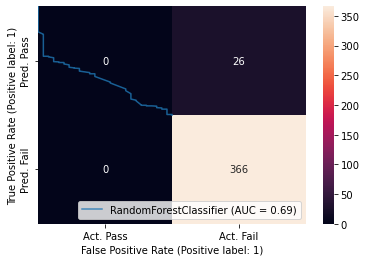

In [53]:
rfc(X_train_sfs,X_test_sfs,4)

## Backward elimination

In [54]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Backward Selection(sbs)
sbs = SFS(LinearRegression(),k_features=15,forward=False,verbose=True,scoring='neg_mean_squared_error')
sbs.fit(X_train_knn, y_train)
sbs_list = list(sbs.k_feature_names_)
print(sbs_list)
# creating a new dataframe using the above variables and adding the target variable
X_train_sbs = X_train_knn[sbs_list]
# From test set deleting columns that are removed in training set
X_test_sbs = X_test_knn[np.array(X_train_sbs.columns)]
X_test_sbs.shape

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 442 out of 442 | elapsed:  1.5min finished
Features: 441/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 441 out of 441 | elapsed:  1.5min finished
Features: 440/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:  1.5min finished
Features: 439/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 439 out of 439 | elapsed:  1.5min finished
Features: 438/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 438 out of 438 | elapsed:  1.5min finished
Features: 437/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 437 out of 437 | elapsed:  1.4min finished
Features: 436/

['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25', 'Feature_26', 'Feature_27', 'Feature_28', 'Feature_29', 'Feature_30', 'Feature_31', 'Feature_32', 'Feature_33', 'Feature_34', 'Feature_35', 'Feature_36', 'Feature_37', 'Feature_38', 'Feature_39', 'Feature_40', 'Feature_41', 'Feature_42', 'Feature_44', 'Feature_45', 'Feature_46', 'Feature_47', 'Feature_48', 'Feature_49', 'Feature_54', 'Feature_55', 'Feature_56', 'Feature_57', 'Feature_58', 'Feature_60', 'Feature_61', 'Feature_62', 'Feature_63', 'Feature_64', 'Feature_65', 'Feature_66', 'Feature_67', 'Feature_68', 'Feature_69', 'Feature_71', 'Feature_72', 'Feature_75', 'Feature_76', 'Feature_77', 'Feature_78', 'Feature_79', 'Feature_80', 'Feature_81', 'Feature_82', 'Feature_83',


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

(392, 425)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.93      1.00      0.97       366

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392

Test Accuracy Score 0.9336734693877551


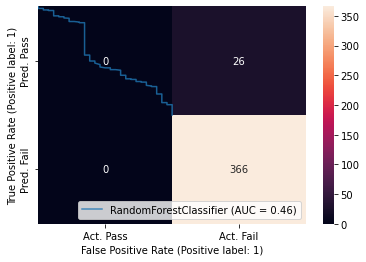

In [55]:
rfc(X_train_sbs,X_test_sbs,6)

## Exhaustive search

In [59]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS



In [60]:
efs = EFS(RandomForestClassifier(n_jobs=4),min_features=15,max_features=20,scoring='roc_auc',
           print_progress=True,cv=2,n_jobs=4) 

In [63]:
efs.fit(X_train_knn, y_train.values.ravel())

KeyboardInterrupt: 

In [ ]:
efs_list = list(efs.best_feature_names_)
print(efs_list)
# creating a new dataframe using the above variables and adding the target variable
X_train_efs = X_train_knn[efs_list]
# From test set deleting columns that are removed in training set
X_test_efs = X_test_knn[np.array(X_train_efs.columns)]
X_test_efs.shape

In [ ]:
rfc(X_train_efs,X_test_efs,6)

## Recursive feature elimination

In [66]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, max_depth=1)

In [67]:
from sklearn.feature_selection import RFE
n_features_to_select = 15
rfe = RFE(regressor, n_features_to_select=n_features_to_select)
rfe.fit(X_train_knn, y_train)


RFE(estimator=RandomForestRegressor(max_depth=1), n_features_to_select=15)

In [80]:
from operator import itemgetter
features = X_train_knn.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

1 Feature_64
1 Feature_65
1 Feature_66
1 Feature_68
1 Feature_104
1 Feature_122
1 Feature_133
1 Feature_154
1 Feature_442
1 Feature_449
1 Feature_453
1 Feature_454
1 Feature_476
1 Feature_540
1 Feature_563
2 Feature_60
3 Feature_562
4 Feature_67
5 Feature_554
6 Feature_63
7 Feature_62
8 Feature_457
9 Feature_455
10 Feature_61
11 Feature_456
12 Feature_458
13 Feature_71
14 Feature_69
15 Feature_460
16 Feature_469
17 Feature_471
18 Feature_75
19 Feature_76
20 Feature_461
21 Feature_72
22 Feature_468
23 Feature_77
24 Feature_79
25 Feature_470
26 Feature_78
27 Feature_472
28 Feature_474
29 Feature_82
30 Feature_478
31 Feature_80
32 Feature_473
33 Feature_81
34 Feature_479
35 Feature_475
36 Feature_84
37 Feature_85
38 Feature_89
39 Feature_477
40 Feature_83
41 Feature_88
42 Feature_87
43 Feature_481
44 Feature_480
45 Feature_491
46 Feature_90
47 Feature_483
48 Feature_484
49 Feature_91
50 Feature_92
51 Feature_94
52 Feature_486
53 Feature_93
54 Feature_487
55 Feature_488
56 Feature_95
57 Fe

In [82]:
rfe_list = ["Feature_64","Feature_65","Feature_66","Feature_68","Feature_104","Feature_122","Feature_133",
            "Feature_154","Feature_442","Feature_449","Feature_453","Feature_454","Feature_476","Feature_540",
            "Feature_563"]
# creating a new dataframe using the above variables and adding the target variable
X_train_rfe = X_train_knn[rfe_list]
# From test set deleting columns that are removed in training set
X_test_rfe = X_test_knn[np.array(X_train_rfe.columns)]
X_test_rfe.shape

(392, 15)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.93      1.00      0.97       366

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392

Test Accuracy Score 0.9336734693877551


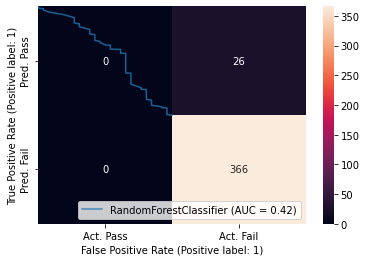

In [83]:
rfc(X_train_rfe,X_test_rfe,6)